In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('data/train_Av_Jh.csv')
test = pd.read_csv('data/test_Av_Jh.csv')

In [3]:
train.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [4]:
test.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
ID                         26496 non-null int64
datetime                   26496 non-null object
temperature                26496 non-null float64
var1                       26496 non-null float64
pressure                   26496 non-null float64
windspeed                  26496 non-null float64
var2                       26496 non-null object
electricity_consumption    26496 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 7 columns):
ID             8568 non-null int64
datetime       8568 non-null object
temperature    8568 non-null float64
var1           8568 non-null float64
pressure       8568 non-null float64
windspeed      8568 non-null float64
var2           8568 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 468.6+ KB


In [7]:
train.describe()

,ID,temperature,var1,pressure,windspeed,electricity_consumption
count,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000
mean,17455.500000,5.098989,-1.916233,986.450615,23.959956,298.359601
std,10122.873673,8.682860,10.424860,12.002647,48.280321,108.020555
min,0.000000,-17.100000,-32.900000,953.000000,1.075000,174.000000
25%,8717.750000,-2.900000,-10.700000,978.000000,3.155000,219.000000
50%,17435.500000,6.400000,-1.400000,986.000000,6.545000,267.000000
75%,26177.250000,12.100000,7.900000,995.000000,22.260000,342.000000
max,34895.000000,23.600000,18.600000,1024.000000,586.600000,1386.000000


In [8]:
test.describe()

,ID,temperature,var1,pressure,windspeed
count,8568.000000,8568.000000,8568.000000,8568.000000,8568.000000
mean,17766.525210,5.112757,-1.726401,986.329599,24.176398
std,10117.296415,8.606167,10.345034,12.148517,49.651535
min,552.000000,-17.900000,-26.400000,954.000000,1.075000
25%,9317.750000,-2.100000,-10.000000,977.000000,3.155000
50%,18083.500000,5.700000,-2.100000,987.000000,6.295000
75%,26297.250000,12.100000,7.900000,995.000000,21.907500
max,35063.000000,25.700000,17.900000,1023.000000,491.255000


In [9]:
train['var2'].value_counts()

A    25239
C     1040
B      217
Name: var2, dtype: int64

In [10]:
train.dtypes

ID                           int64
datetime                    object
temperature                float64
var1                       float64
pressure                   float64
windspeed                  float64
var2                        object
electricity_consumption    float64
dtype: object

In [11]:
test.dtypes

ID               int64
datetime        object
temperature    float64
var1           float64
pressure       float64
windspeed      float64
var2            object
dtype: object

In [12]:
train.shape, test.shape

((26496, 8), (8568, 7))

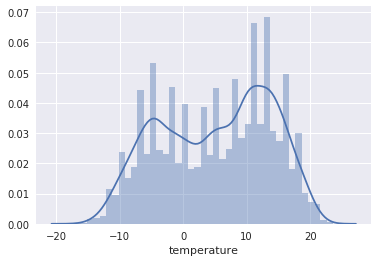

In [13]:
sns.distplot(train['temperature'])

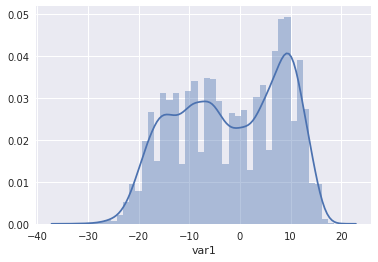

In [14]:
sns.distplot(train['var1'])

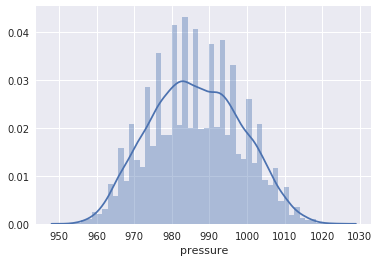

In [15]:
sns.distplot(train['pressure'])

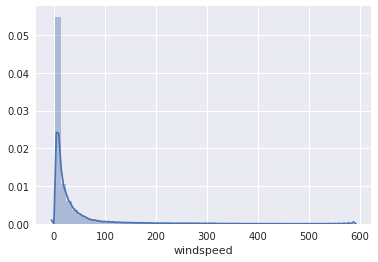

In [16]:
sns.distplot(train['windspeed'])

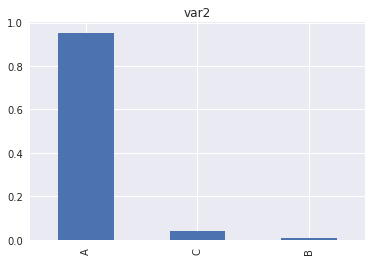

In [17]:
train['var2'].value_counts(normalize=True).plot.bar(title= 'var2')

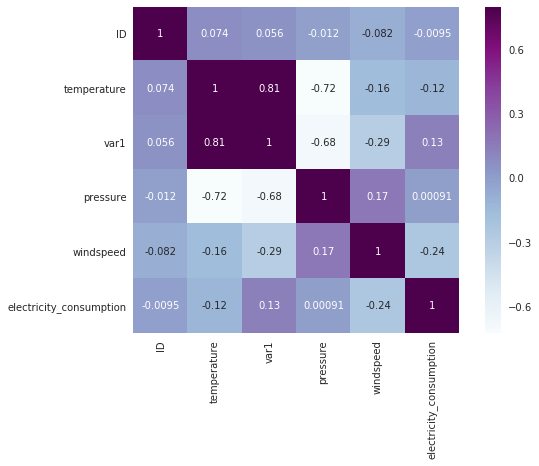

In [18]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, annot = True, square=True, cmap="BuPu");

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
year = pd.to_datetime(train['datetime']).map(lambda x: x.strftime('%Y'))
year = year.values

month = pd.to_datetime(train['datetime']).map(lambda x: x.strftime('%m'))
month = month.values

date = pd.to_datetime(train['datetime']).map(lambda x: x.strftime('%d'))
date = date.values

hour = pd.to_datetime(train['datetime']).map(lambda x: x.strftime('%H')) 
hour = hour.values

In [21]:
t_year = pd.to_datetime(test['datetime']).map(lambda x: x.strftime('%Y'))
t_year = t_year.values

t_month = pd.to_datetime(test['datetime']).map(lambda x: x.strftime('%m'))
t_month = t_month.values

t_date = pd.to_datetime(test['datetime']).map(lambda x: x.strftime('%d'))
t_date = t_date.values

t_hour = pd.to_datetime(test['datetime']).map(lambda x: x.strftime('%H')) 
t_hour = t_hour.values

In [22]:
train['year'] = year
train['month'] = month
train['date'] = date
train['hour'] = hour

In [23]:
test['year'] = t_year
test['month'] = t_month
test['date'] = t_date
test['hour'] = t_hour

In [24]:
train.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,year,month,date,hour
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,2013,07,01,00
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,2013,07,01,01
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,2013,07,01,02
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,2013,07,01,03
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,2013,07,01,04


In [25]:
test.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,year,month,date,hour
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A,2013,07,24,00
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A,2013,07,24,01
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A,2013,07,24,02
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A,2013,07,24,03
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A,2013,07,24,04


In [26]:
le = LabelEncoder()
train['var2']= le.fit_transform(train['var2'])
test['var2']= le.fit_transform(test['var2'])

In [27]:
train = train.drop(['ID', 'datetime'], axis = 1)
ID = test.ID
test = test.drop(['ID', 'datetime'], axis = 1)

In [28]:
X = train.drop(['electricity_consumption'],axis = 1)
y = train['electricity_consumption']

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state = 8)

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(learning_rate = 0.1, random_state = 1234)
gbm.fit(X,y)
predictr = gbm.predict(X_valid)
gbm.score(X_valid,y_valid)

0.4665574594032156

In [32]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_valid, predictr)))

78.06482212382782


In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X,y)
predictr_rf = rf.predict(X_valid)
rf.score(X_valid,y_valid)

0.963993856281003

In [34]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_valid, predictr_rf)))

20.2814899446515


In [35]:
predictr_gbm_t = gbm.predict(test)

In [36]:
predictr_rf_t = rf.predict(test)

In [37]:
pred = (predictr_gbm_t + predictr_rf_t)/2
pred

array([222.2571276 , 222.30601046, 223.52744911, ..., 207.8194913 ,
       206.40080161, 206.38989288])

In [38]:
df= pd.DataFrame(list(zip(ID, pred)), columns = ['ID', 'electricity_consumption'])

In [39]:
df.head()

,ID,electricity_consumption
0,552,222.257128
1,553,222.306010
2,554,223.527449
3,555,238.329003
4,556,358.121282


In [40]:
df.shape

(8568, 2)

In [41]:
df.to_csv('submission.csv', index = False)